In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [6]:
len(glob('UCF11_updated_mpg/*/*/*.mpg'))
print(len(glob('UCF11_updated_mpg/*/*/*.mpg')))
file_paths = glob('UCF11_updated_mpg/*/*/*.mpg')

1600


In [7]:
print(file_paths[0])

UCF11_updated_mpg\basketball\v_shooting_01\v_shooting_01_01.mpg


In [8]:
cap = cv2.VideoCapture(file_paths[0])

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (256, 256))
    frame = frame[:, :, [2, 1, 0]] # BGR -> RGB
    frames.append(frame)
cap.release()

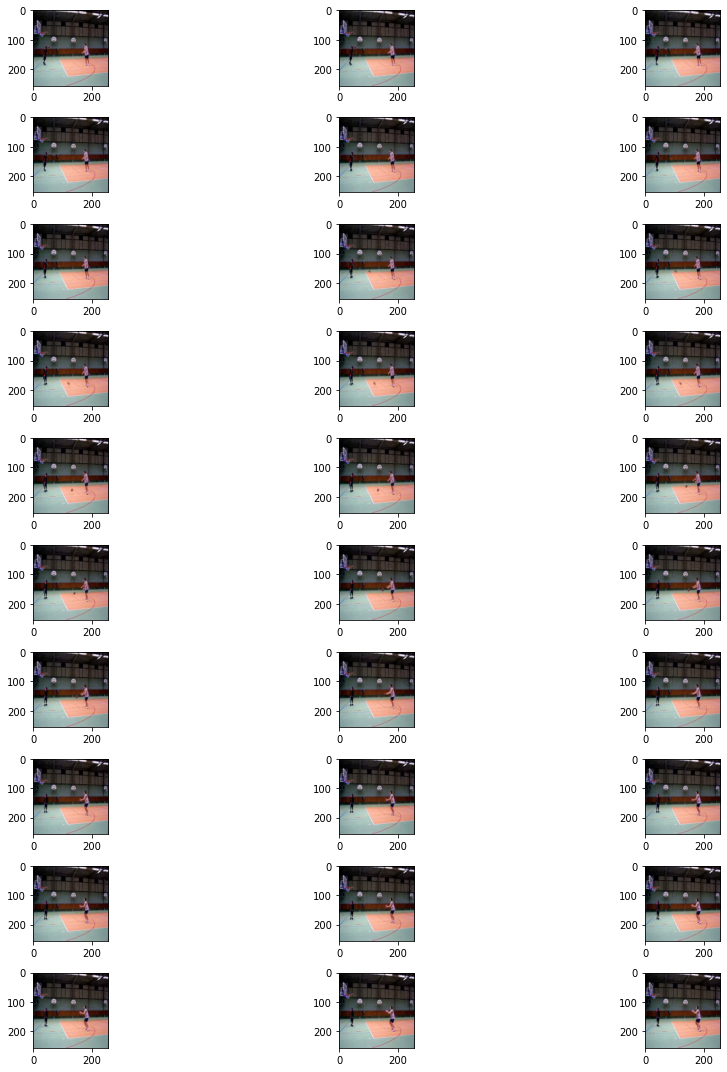

In [9]:
arr = np.array(frames)
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(10, 3, 1 + 3*i)
    plt.imshow(arr[1 + 3*i])
    plt.subplot(10, 3, 2 + 3*i)
    plt.imshow(arr[2 + 3*i])
    plt.subplot(10, 3, 3 + 3*i)
    plt.imshow(arr[3 + 3*i])
plt.tight_layout()

In [10]:
len(frames) / 29.97

3.6036036036036037

In [11]:
for file_path in file_paths:
    cap = cv2.VideoCapture(file_path)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(file_path)
    print(length, 'frames')
    print(length / 29.97, 'sec')
    cap.release()
    break

UCF11_updated_mpg\basketball\v_shooting_01\v_shooting_01_01.mpg
107 frames
3.570236903570237 sec


In [12]:
import pandas as pd

df = pd.DataFrame(columns=[
    'file_path', 'frames', 'duration',
    'label'
])

for file_path in file_paths:
    label = file_path.split('\\')[1]
    
    cap = cv2.VideoCapture(file_path)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frames / 29.97
    elem = {
        'file_path': file_path,
        'frames': frames,
        'duration': duration,
        'label': label
    }
    df.loc[len(df)] = elem
    cap.release()

In [13]:
df

,file_path,frames,duration,label
0,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,107,3.570237,basketball
1,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,139,4.637971,basketball
2,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,148,4.938272,basketball
3,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,100,3.336670,basketball
4,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,140,4.671338,basketball
...,...,...,...,...
1595,UCF11_updated_mpg\walking\v_walk_dog_24\v_walk...,239,7.974641,walking
1596,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking
1597,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking
1598,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking


In [14]:
df_duration_sum_by_label = df.groupby('label').duration.sum().rename('Sum').\
    reset_index().set_index('label')

df_duration_sum_by_label

,Sum
label,
basketball,639.139139
biking,1094.060727
diving,891.157824
golf_swing,786.586587
horse_riding,1296.429763
soccer_juggling,1522.655989
swing,921.588255
tennis_swing,883.416750
trampoline_jumping,799.799800


In [15]:
df_duration_avg_by_label = df.groupby('label').duration.mean().rename('Average').\
    reset_index().set_index('label')

df_duration_avg_by_label

,Average
label,
basketball,4.532902
biking,7.545246
diving,5.712550
golf_swing,5.539342
horse_riding,6.547625
soccer_juggling,9.760615
swing,6.726922
tennis_swing,5.289921
trampoline_jumping,6.721007


<AxesSubplot:xlabel='label'>

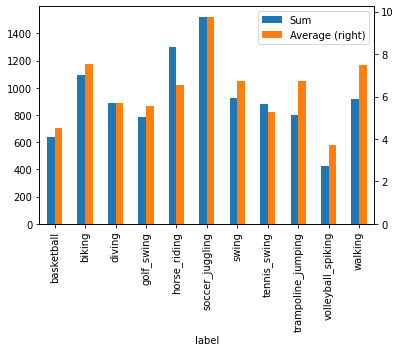

In [16]:
df_video_stats = pd.concat([df_duration_sum_by_label, df_duration_avg_by_label], axis=1)
df_video_stats.plot.bar(secondary_y='Average')

In [17]:
# def sec10(data):
#     if data >= 10.0:
#         return True
# def sec5(data):
#     if data >= 5.0 and data < 10.0:
#         return True
# def sec2(data):
#     if data >= 2.0 and data < 5.0:
#         return True
# def sec0(data):
#     if data >= 0.0 and data < 2.0:
#         return True


# df['> 10.0 Sec'] = df['duration'].apply(sec10)
# df['5.0 - 10.0 Sec'] = df['duration'].apply(sec5)
# df['2.0 - 5.0 Sec'] = df['duration'].apply(sec2)
# df['0.0 - 2.0 Sec'] = df['duration'].apply(sec0)

df['> 10.0 Sec'] = df['duration'] >= 10.0
df['5.0 - 10.0 Sec'] = (df['duration'] >= 5.0) & (df['duration'] < 10.0)
df['2.0 - 5.0 Sec'] = (df['duration'] >= 2.0) & (df['duration'] < 5.0)
df['0.0 - 2.0 Sec'] = (df['duration'] >= 0.0) & (df['duration'] < 2.0)


df

,file_path,frames,duration,label,> 10.0 Sec,5.0 - 10.0 Sec,2.0 - 5.0 Sec,0.0 - 2.0 Sec
0,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,107,3.570237,basketball,False,False,True,False
1,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,139,4.637971,basketball,False,False,True,False
2,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,148,4.938272,basketball,False,False,True,False
3,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,100,3.336670,basketball,False,False,True,False
4,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,140,4.671338,basketball,False,False,True,False
...,...,...,...,...,...,...,...,...
1595,UCF11_updated_mpg\walking\v_walk_dog_24\v_walk...,239,7.974641,walking,False,True,False,False
1596,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking,False,True,False,False
1597,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking,False,True,False,False
1598,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking,False,True,False,False


In [18]:
df_groupby_label = df.groupby('label')
df_groupby_stats = pd.concat([
    df_groupby_label['0.0 - 2.0 Sec'].sum().reset_index().set_index('label'),
    df_groupby_label['2.0 - 5.0 Sec'].sum().reset_index().set_index('label'),
    df_groupby_label['5.0 - 10.0 Sec'].sum().reset_index().set_index('label'),
    df_groupby_label['> 10.0 Sec'].sum().reset_index().set_index('label')
], axis=1)

df_groupby_stats

,0.0 - 2.0 Sec,2.0 - 5.0 Sec,5.0 - 10.0 Sec,> 10.0 Sec
label,,,,
basketball,5,102,28,6
biking,0,9,113,23
diving,2,57,91,6
golf_swing,0,79,56,7
horse_riding,2,14,180,2
soccer_juggling,0,9,88,59
swing,0,15,104,18
tennis_swing,0,90,70,7
trampoline_jumping,0,12,101,6


<AxesSubplot:xlabel='label', ylabel='Number of Videos'>

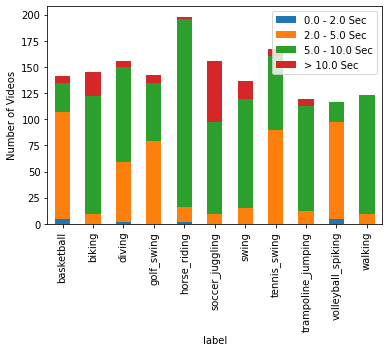

In [19]:
df_groupby_stats.plot.bar(stacked=True, ylabel='Number of Videos')

In [20]:
import random

In [21]:
label_dir = glob('UCF11_updated_mpg/*')
label_dir

['UCF11_updated_mpg\\basketball',
 'UCF11_updated_mpg\\biking',
 'UCF11_updated_mpg\\diving',
 'UCF11_updated_mpg\\golf_swing',
 'UCF11_updated_mpg\\horse_riding',
 'UCF11_updated_mpg\\soccer_juggling',
 'UCF11_updated_mpg\\swing',
 'UCF11_updated_mpg\\tennis_swing',
 'UCF11_updated_mpg\\trampoline_jumping',
 'UCF11_updated_mpg\\volleyball_spiking',
 'UCF11_updated_mpg\\walking']

In [22]:
# 11개의 클래스
# 클래스당 25개의 영상 그룹
# 1 ~ 20 : 학습 그룹
# 20 ~ 25 : 테스트 그룹

train_df = pd.DataFrame(
    columns=['file_path', 'label']
)

valid_df = pd.DataFrame(
    columns=['file_path', 'label']
)

label_dirs = glob('UCF11_updated_mpg/*')
for label_dir in label_dirs:
    file_dirs = glob(
        label_dir + '\\v_*'
    )
    random.shuffle(file_dirs)
    
    for i in range(20):
        train_dir = file_dirs[i]
        label = train_dir.split('\\')[-1].split('_')[1]
        file_path = random.choice(
            glob(train_dir + '\\*')
        )
        train_df.loc[len(train_df)] = [file_path, label]
        
    for i in range(20, 25):
        valid_dir = file_dirs[i]
        label = valid_dir.split('\\')[-1].split('_')[1]
        file_path = random.choice(
            glob(train_dir + '\\*')
        )
        valid_df.loc[len(valid_df)] = [file_path, label]

In [23]:
print(len(train_df))
print(len(valid_df))


220
55


In [24]:
train_df

,file_path,label
0,UCF11_updated_mpg\basketball\v_shooting_14\v_s...,shooting
1,UCF11_updated_mpg\basketball\v_shooting_03\v_s...,shooting
2,UCF11_updated_mpg\basketball\v_shooting_21\v_s...,shooting
3,UCF11_updated_mpg\basketball\v_shooting_04\v_s...,shooting
4,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,shooting
...,...,...
215,UCF11_updated_mpg\walking\v_walk_dog_13\v_walk...,walk
216,UCF11_updated_mpg\walking\v_walk_dog_06\v_walk...,walk
217,UCF11_updated_mpg\walking\v_walk_dog_03\v_walk...,walk
218,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,walk


In [25]:
import os

os.mkdir('UCF11_updated_png')
os.mkdir('UCF11_updated_png/train')
os.mkdir('UCF11_updated_png/valid')

In [26]:
train_df.to_csv('ucf11_train_vid.csv', index=False)
valid_df.to_csv('ucf11_valid_vid.csv', index=False)

In [27]:
max_frame = 10
SAVE_DIR = 'UCF11_updated_png/'

for i, elem in train_df.iterrows():
    cap = cv2.VideoCapture(
    elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
    
    label = elem['label']
    for j, frame in enumerate(frames):
        file_name = f'train/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name, frame)
    
    cap.release()

In [28]:
print(len(glob(SAVE_DIR + 'train/*')))

2191


In [29]:
max_frame = 10
SAVE_DIR = 'UCF11_updated_png/'

for i, elem in valid_df.iterrows():
    cap = cv2.VideoCapture(
    elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
    
    label = elem['label']
    for j, frame in enumerate(frames):
        file_name = f'valid/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name, frame)
    
    cap.release()

In [30]:
print(len(glob(SAVE_DIR + 'valid/*')))

550
